# preprocessing


#### iot23 

In [25]:
import pandas as pd

# Load the dataset
iot23_data = pd.read_csv('iot23.csv', low_memory=False)

# Display the shape of the dataset
print("Shape of the iot23 dataset:", iot23_data.shape)

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(iot23_data.head())

# List all column names
print("\nColumn names in the dataset:")
print(iot23_data.columns)

# Check data types of all columns
print("\nData types of each column:")
print(iot23_data.dtypes)



Shape of the iot23 dataset: (6046623, 22)

First few rows of the dataset:
   Unnamed: 0            ts                 uid        id.orig_h  id.orig_p  \
0           0  1.536227e+09  CeqqKl3hyLQmO8LK98  192.168.100.111    17576.0   
1           1  1.536227e+09   C2oHQWo1EFGH8D9x7  192.168.100.111    17576.0   
2           2  1.536227e+09  CJLVjs4BByG04mczXc  192.168.100.111    17576.0   
3           3  1.536227e+09   C0z4uS9AWHDH2s4S7  192.168.100.111    17576.0   
4           4  1.536227e+09  CxbNVk3liFNUIlqSPi  192.168.100.111    17576.0   

        id.resp_h  id.resp_p proto service duration  ... conn_state  \
0    78.1.220.212     8081.0   tcp       -    3e-06  ...         S0   
1    152.84.7.111     8081.0   tcp       -    2e-06  ...         S0   
2    173.36.41.67     8081.0   tcp       -    2e-06  ...         S0   
3    87.13.21.104     8081.0   tcp       -    2e-06  ...         S0   
4  99.110.163.140     8081.0   tcp       -    2e-06  ...         S0   

  local_orig local_resp 

In [23]:
import pandas as pd
import os

# Check if the CSV file exists before loading
file_path = 'iot23.csv'
if not os.path.exists(file_path):
    raise FileNotFoundError(f"The file {file_path} does not exist.")

# Load the dataset
try:
    iot23_data = pd.read_csv(file_path, low_memory=False)
except Exception as e:
    raise RuntimeError(f"Error loading {file_path}: {e}")

# List of columns to keep initially
columns_to_keep = [
    'ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'proto', 
    'service', 'duration', 'orig_bytes', 'resp_bytes', 'conn_state', 
    'local_orig', 'local_resp', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 
    'resp_pkts', 'resp_ip_bytes', 'label'
]

# Filter columns that exist in the DataFrame
columns_to_keep = [col for col in columns_to_keep if col in iot23_data.columns]
filtered_iot23_data = iot23_data[columns_to_keep]

# Identify columns to check for uniqueness
columns_to_check = [
    'uid', 'id.orig_h', 'proto', 'conn_state', 'service', 
    'duration', 'orig_bytes', 'resp_bytes', 'local_orig', 'local_resp', 
    'ts', 'id.orig_p', 'id.resp_p', 'missed_bytes', 'id.resp_h', 
    'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes'
]

# Remove columns with all unique values or where all values are the same
columns_to_remove = []
for column in columns_to_check:
    if column in filtered_iot23_data.columns:
        unique_values = filtered_iot23_data[column].nunique()
        total_values = filtered_iot23_data.shape[0]
        if unique_values == 1 or unique_values == total_values:
            columns_to_remove.append(column)

# Filter the dataframe to keep only the selected columns
columns_to_keep = [col for col in columns_to_keep if col not in columns_to_remove]
filtered_iot23_data = filtered_iot23_data[columns_to_keep]

# Add 'attack' column based on 'label' column and drop the 'label' column
filtered_iot23_data['attack'] = filtered_iot23_data['label'].apply(lambda x: 0 if x == 'Benign' else 1)
filtered_iot23_data = filtered_iot23_data.drop(columns=['label'])

# Save the cleaned data to a new CSV file
filtered_iot23_data.to_csv('cleaned_iot23.csv', index=False)


#### kdd-iot

In [2]:
import pandas as pd

# Load the datasets
data = pd.read_csv('kdd_iot.csv', low_memory=False)

# Display the shape of the dataset
print("Shape of the kdd dataset:", data.shape)

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(data.head())

# Get a summary of the dataset
print("\nSummary of the dataset:")
print(data.describe(include='all'))

# List all column names
print("\nColumn names in the dataset:")
print(data.columns)

# Check data types of all columns
print("\nData types of each column:")
print(data.dtypes)

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

Shape of the dataset: (148517, 42)

First few rows of the dataset:
   duration   protocol_type         service flag  src_bytes  dst_bytes  land  \
0         0             tcp        ftp_data   SF        491          0     0   
1         0             udp           other   SF        146          0     0   
2         0             tcp         private   S0          0          0     0   
3         0             tcp            http   SF        232       8153     0   
4         0             tcp            http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                   

In [8]:
iot23_features = [
    'proto', 'id.orig_h', 'id.resp_p', 'id.resp_h', 'orig_ip_bytes',
    'conn_state', 'id.orig_p', 'resp_bytes', 'local_orig', 'service',
    'orig_bytes', 'resp_ip_bytes', 'duration', 'resp_pkts'
]

# Mapping dictionary
feature_mapping = {
    'proto': 'protocol_type',
    'orig_bytes': 'src_bytes',
    'resp_bytes': 'dst_bytes',
    'conn_state': 'flag',
    'label': 'labels',
    'duration': 'duration',
    'service': 'service',
    'orig_pkts': 'count',
    'orig_ip_bytes': 'src_bytes',
    'resp_pkts': 'srv_count',
    'resp_ip_bytes': 'dst_bytes',
    'local_orig': 'is_host_login',
    'local_resp': 'is_guest_login',
    'missed_bytes': 'wrong_fragment',
    'history': 'hot',
    'threat': 'num_compromised'
}

# Determine the corresponding features in KDD-IoT
mapped_features = {feature: feature_mapping.get(feature) for feature in iot23_features if feature in feature_mapping}
mapped_features

{'proto': 'protocol_type',
 'orig_ip_bytes': 'src_bytes',
 'conn_state': 'flag',
 'resp_bytes': 'dst_bytes',
 'local_orig': 'is_host_login',
 'service': 'service',
 'orig_bytes': 'src_bytes',
 'resp_ip_bytes': 'dst_bytes',
 'duration': 'duration',
 'resp_pkts': 'srv_count'}

In [17]:
import pandas as pd

# Read the CSV file
kdd_data = pd.read_csv('kdd_iot.csv', low_memory=False)

# Define the feature mapping
feature_mapping = {
    'proto': 'protocol_type',
    'orig_ip_bytes': 'src_bytes',
    'conn_state': 'flag',
    'resp_bytes': 'dst_bytes',
    'local_orig': 'is_host_login',
    'service': 'service',
    'orig_bytes': 'src_bytes',
    'resp_ip_bytes': 'dst_bytes',
    'duration': 'duration',
    'resp_pkts': 'srv_count',
    'labels' : 'labels'
}

# Rename features
kdd_data.rename(columns=feature_mapping, inplace=True)

# Identify common features after renaming
common_features = [
    'protocol_type', 'src_bytes', 'flag', 'dst_bytes', 
    'is_host_login', 'service', 'src_bytes', 'dst_bytes', 
    'duration', 'srv_count','labels'
]

# Ensure all column names are unique before filtering
kdd_data = kdd_data.loc[:, ~kdd_data.columns.duplicated()]

# Filter the datasets to keep only the common features
kdd_filtered = kdd_data[common_features]

# Rename features back to original names
reverse_feature_mapping = {v: k for k, v in feature_mapping.items()}
kdd_filtered.rename(columns=reverse_feature_mapping, inplace=True)

# Ensure consistent data types 
kdd_filtered = kdd_filtered.astype(str)

# Print the first few rows of the filtered dataframe
print(kdd_filtered.head())
# Add 'attack' column based on 'label' column and drop the 'label' column
kdd_filtered['attack'] = kdd_filtered['labels'].apply(lambda x: 0 if x == 'normal' else 1)
kdd_filtered = kdd_filtered.drop(columns=['labels'])

kdd_filtered.to_csv('kdd_cleaned.csv',index=False)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5728\3337197173.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kdd_filtered.rename(columns=reverse_feature_mapping, inplace=True)


            proto orig_bytes conn_state resp_ip_bytes local_orig  \
0             tcp        491         SF             0          0   
1             udp        146         SF             0          0   
2             tcp          0         S0             0          0   
3             tcp        232         SF          8153          0   
4             tcp        199         SF           420          0   

          service orig_bytes resp_ip_bytes duration resp_pkts   labels  
0        ftp_data        491             0        0         2   normal  
1           other        146             0        0         1   normal  
2         private          0             0        0         6  neptune  
3            http        232          8153        0         5   normal  
4            http        199           420        0        32   normal  


# Future extraction

#### iot23

In [4]:
import pandas as pd
from category_encoders import CatBoostEncoder
import time

start_time = time.time()

# Load the dataset with pandas
combined_data = pd.read_csv(
    'cleaned_iot23.csv',
    na_values=['-'],  # Treat '-' as NaN
    dtype=str  # Load all data as strings to handle mixed types
)

print(f"Data loaded in {time.time() - start_time:.2f} seconds")

# Strip any extra spaces from the column names
combined_data.columns = combined_data.columns.str.strip()

# Replace '-' with NaN
combined_data.replace('-', pd.NA, inplace=True)

# Define the numeric and categorical columns
numeric_columns = [
    'id.orig_p', 'id.resp_p', 'orig_ip_bytes', 'resp_ip_bytes', 'orig_pkts', 'resp_pkts',
    'duration', 'orig_bytes', 'resp_bytes', 'missed_bytes'
]

categorical_features = [
    'id.orig_h', 'id.resp_h', 'proto', 'service', 'conn_state'
]

# Convert specific columns to numeric
conversion_start_time = time.time()
combined_data[numeric_columns] = combined_data[numeric_columns].apply(pd.to_numeric, errors='coerce')
print(f"Numeric columns converted in {time.time() - conversion_start_time:.2f} seconds")

# Identify and convert categorical features to string dtype
combined_data[categorical_features] = combined_data[categorical_features].astype(str)

# Handle missing values (fill numeric columns with median and categorical columns with mode)
missing_values_start_time = time.time()
for col in numeric_columns:
    combined_data[col].fillna(combined_data[col].median(), inplace=True)

for col in categorical_features:
    combined_data[col].fillna(combined_data[col].mode()[0], inplace=True)
print(f"Missing values handled in {time.time() - missing_values_start_time:.2f} seconds")

# Reduce cardinality of categorical features
for col in categorical_features:
    value_counts = combined_data[col].value_counts()
    combined_data[col] = combined_data[col].apply(lambda x: x if value_counts[x] > 10 else 'Other')

# Ensure 'attack' column is numeric
combined_data['attack'] = pd.to_numeric(combined_data['attack'], errors='coerce')

# Drop rows with NaN values in the 'attack' column after conversion
combined_data.dropna(subset=['attack'], inplace=True)

# Define feature matrix X and target vector y
X_train = combined_data.drop(columns=['attack'])
y_train = combined_data['attack']

# Verify categorical features exist in X
categorical_features = [col for col in categorical_features if col in X_train.columns]
print(f"Categorical features to encode: {categorical_features}")

# Initialize and fit CatBoostEncoder
encoding_start_time = time.time()
catboost_encoder = CatBoostEncoder(cols=categorical_features)

# Fit and transform the encoder on the entire dataset
X_train_encoded = catboost_encoder.fit_transform(X_train, y_train)
print(f"Categorical encoding completed in {time.time() - encoding_start_time:.2f} seconds")

# Add the target column back to the encoded data
X_train_encoded['attack'] = y_train

# Save the encoded data to a new CSV file
save_start_time = time.time()
X_train_encoded.to_csv('encoded_iot23.csv', index=False)
print(f"Encoded data saved in {time.time() - save_start_time:.2f} seconds")

# Display the first few rows of the encoded training data
print("\nFirst few rows of the encoded training data:")
print(X_train_encoded.head())
print(X_train_encoded.shape)

# Check for any missing values in the encoded data
print("\nMissing values in the encoded training data:")
print(X_train_encoded.isnull().sum())

# Display the first few rows of the target column
print("y head:", y_train.head())

# Verify the encoding consistency
print("\nChecking the encoding consistency:")
for col in categorical_features:
    original_value_counts = combined_data[col].value_counts()
    encoded_value_counts = X_train_encoded[col].value_counts()
    print(f"\nValue counts for '{col}':")
    print(f"Original: {original_value_counts.head()}")
    print(f"Encoded: {encoded_value_counts.head()}")

print(f"\nTotal script execution time: {time.time() - start_time:.2f} seconds")


Data loaded in 6.30 seconds
Numeric columns converted in 8.77 seconds
Missing values handled in 4.90 seconds
Categorical features to encode: ['id.orig_h', 'id.resp_h', 'proto', 'service', 'conn_state']
Categorical encoding completed in 9.17 seconds
Encoded data saved in 42.55 seconds

First few rows of the encoded training data:
   id.orig_h  id.orig_p  id.resp_h  id.resp_p     proto   service  duration  \
0   0.886083    17576.0   0.886083     8081.0  0.886083  0.886083  0.000003   
1   0.943042    17576.0   0.943042     8081.0  0.943042  0.943042  0.000002   
2   0.962028    17576.0   0.962028     8081.0  0.962028  0.962028  0.000002   
3   0.971521    17576.0   0.971521     8081.0  0.971521  0.971521  0.000002   
4   0.977217    17576.0   0.977217     8081.0  0.977217  0.977217  0.000002   

   orig_bytes  resp_bytes  conn_state  missed_bytes  orig_pkts  orig_ip_bytes  \
0         0.0         0.0    0.886083           0.0        2.0           80.0   
1         0.0         0.0    0.9

#### kdd-iot


In [18]:
import pandas as pd
from category_encoders import CatBoostEncoder
import time

start_time = time.time()

# Load the dataset with pandas
combined_data = pd.read_csv(
    'kdd_cleaned.csv',
    na_values=['-'],  # Treat '-' as NaN
    dtype=str  # Load all data as strings to handle mixed types
)

print(f"Data loaded in {time.time() - start_time:.2f} seconds")

# Strip any extra spaces from the column names
combined_data.columns = combined_data.columns.str.strip()

# Replace '-' with NaN
combined_data.replace('-', pd.NA, inplace=True)

# Print the column names for inspection
print("Columns in the dataset:")
print(combined_data.columns)

# Define the numeric and categorical columns (update these based on the actual columns in your dataset)
numeric_columns = ['orig_ip_bytes','resp_bytes', 'orig_bytes', 'resp_ip_bytes', 'duration', 'resp_pkts']
categorical_features = ['proto', 'service', 'conn_state']

# Ensure all specified columns exist in the dataset
numeric_columns = [col for col in numeric_columns if col in combined_data.columns]
categorical_features = [col for col in categorical_features if col in combined_data.columns]

# Convert specific columns to numeric
conversion_start_time = time.time()
combined_data[numeric_columns] = combined_data[numeric_columns].apply(pd.to_numeric, errors='coerce')
print(f"Numeric columns converted in {time.time() - conversion_start_time:.2f} seconds")

# Identify and convert categorical features to string dtype
combined_data[categorical_features] = combined_data[categorical_features].astype(str)

# Handle missing values (fill numeric columns with median and categorical columns with mode)
missing_values_start_time = time.time()
for col in numeric_columns:
    combined_data[col].fillna(combined_data[col].median(), inplace=True)

for col in categorical_features:
    combined_data[col].fillna(combined_data[col].mode()[0], inplace=True)
print(f"Missing values handled in {time.time() - missing_values_start_time:.2f} seconds")

# Reduce cardinality of categorical features
for col in categorical_features:
    value_counts = combined_data[col].value_counts()
    combined_data[col] = combined_data[col].apply(lambda x: x if value_counts[x] > 10 else 'Other')

# Ensure 'attack' column is numeric
combined_data['attack'] = pd.to_numeric(combined_data['attack'], errors='coerce')

# Drop rows with NaN values in the 'attack' column after conversion
combined_data.dropna(subset=['attack'], inplace=True)

# Define feature matrix X and target vector y
X_train = combined_data.drop(columns=['attack'])
y_train = combined_data['attack']

# Verify categorical features exist in X
categorical_features = [col for col in categorical_features if col in X_train.columns]
print(f"Categorical features to encode: {categorical_features}")

# Initialize and fit CatBoostEncoder
encoding_start_time = time.time()
catboost_encoder = CatBoostEncoder(cols=categorical_features)

# Fit and transform the encoder on the entire dataset
X_train_encoded = catboost_encoder.fit_transform(X_train, y_train)
print(f"Categorical encoding completed in {time.time() - encoding_start_time:.2f} seconds")

# Add the target column back to the encoded data
X_train_encoded['attack'] = y_train

# Save the encoded data to a new CSV file
save_start_time = time.time()
X_train_encoded.to_csv('encoded_kdd-iot.csv', index=False)
print(f"Encoded data saved in {time.time() - save_start_time:.2f} seconds")

# Display the first few rows of the encoded training data
print("\nFirst few rows of the encoded training data:")
print(X_train_encoded.head())
print(X_train_encoded.shape)

# Check for any missing values in the encoded data
print("\nMissing values in the encoded training data:")
print(X_train_encoded.isnull().sum())

# Display the first few rows of the target column
print("y head:", y_train.head())

# Verify the encoding consistency
print("\nChecking the encoding consistency:")
for col in categorical_features:
    original_value_counts = combined_data[col].value_counts()
    encoded_value_counts = X_train_encoded[col].value_counts()
    print(f"\nValue counts for '{col}':")
    print(f"Original: {original_value_counts.head()}")
    print(f"Encoded: {encoded_value_counts.head()}")

print(f"\nTotal script execution time: {time.time() - start_time:.2f} seconds")


Data loaded in 0.11 seconds
Columns in the dataset:
Index(['proto', 'orig_bytes', 'conn_state', 'resp_ip_bytes', 'local_orig',
       'service', 'orig_bytes.1', 'resp_ip_bytes.1', 'duration', 'resp_pkts',
       'attack'],
      dtype='object')
Numeric columns converted in 0.17 seconds
Missing values handled in 0.04 seconds
Categorical features to encode: ['proto', 'service', 'conn_state']
Categorical encoding completed in 0.20 seconds
Encoded data saved in 0.50 seconds

First few rows of the encoded training data:
      proto  orig_bytes  conn_state  resp_ip_bytes local_orig   service  \
0  0.470848         491    0.470848              0          0  0.470848   
1  0.470848         146    0.235424              0          0  0.470848   
2  0.470848           0    0.470848              0          0  0.470848   
3  0.735424         232    0.156949           8153          0  0.470848   
4  0.490283         199    0.117712            420          0  0.235424   

  orig_bytes.1 resp_ip_bytes

# Train and bild the model

In [13]:
import pandas as pd

# Load the dataset
iot23_data = pd.read_csv('./encoded_iot23.csv', low_memory=False)

# Display the shape of the dataset
print("Shape of the dataset:", iot23_data.shape)

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(iot23_data.head())

# Get a summary of the dataset
print("\nSummary of the dataset:")
print(iot23_data.describe(include='all'))

# List all column names
print("\nColumn names in the dataset:")
print(iot23_data.columns)

# Check data types of all columns
print("\nData types of each column:")
print(iot23_data.dtypes)

# Check for missing values
print("\nMissing values in each column:")
print(iot23_data.isnull().sum())


Shape of the dataset: (6195140, 13)

First few rows of the dataset:
   src_bytes       hot  is_host_login  duration  dst_bytes  is_guest_login  \
0        0.0  1.223441       1.223441  0.000003        0.0        1.223441   
1        0.0  0.611720       1.223441  0.000002        0.0        1.223441   
2        0.0  0.407814       0.611720  0.000002        0.0        0.611720   
3        0.0  0.305860       0.407814  0.000002        0.0        0.407814   
4        0.0  0.244688       0.305860  0.000002        0.0        0.305860   

    service  count  srv_count  wrong_fragment  protocol_type      flag  labels  
0  1.223441    0.0        0.0             0.0       1.223441  1.223441       0  
1  1.223441    2.0        0.0             0.0       1.223441  1.223441       0  
2  0.611720    2.0        0.0             0.0       0.611720  0.611720       0  
3  0.407814    2.0        0.0             0.0       0.407814  0.407814       0  
4  0.305860    2.0        0.0             0.0       0.3058

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from itertools import product
import joblib
import time

# Load the dataset
iot23_data = pd.read_csv('encoded_iot23.csv', low_memory=False)

# Split the data into training (90%) and testing (10%) sets
train_data, test_data = train_test_split(iot23_data, test_size=0.1, stratify=iot23_data['attack'], random_state=42)

# Further split the training data into two parts (50%-50%) for calculating target statistics and training
train_data_1, train_data_2 = train_test_split(train_data, test_size=0.5, stratify=train_data['attack'], random_state=42)

# Function to calculate target statistics for multiple categorical features
def calculate_target_statistics(df, target_col, categorical_cols):
    target_stats = df.copy()
    for col in categorical_cols:
        stats = df.groupby(col)[target_col].agg(['mean', 'median', 'count']).reset_index()
        stats = stats.rename(columns={
            'mean': col + '_mean',
            'median': col + '_median',
            'count': col + '_count'
        })
        target_stats = target_stats.merge(stats, on=col, how='left')
    return target_stats

# List of categorical features (example)
categorical_features = ['proto', 'service', 'conn_state']

# Calculate target statistics using train_data_1
train_data_2 = calculate_target_statistics(train_data_1, 'attack', categorical_features)

# Similarly, apply target statistics to the test set
test_data = calculate_target_statistics(train_data_1, 'attack', categorical_features)

# Prepare data for CatBoost
X_train = train_data_2.drop(columns=['attack'])
y_train = train_data_2['attack']

X_test = test_data.drop(columns=['attack'])
y_test = test_data['attack']

# Define the hyperparameters grid
param_grid = {
    'max_depth': [5],
    'iterations': [500],
    'learning_rate': [0.01],
    'l2_leaf_reg': [ 5],
    'bagging_temperature': [0.4],
    'random_strength': [3]
}

# Get all combinations of hyperparameters
param_combinations = list(product(
    param_grid['max_depth'],
    param_grid['iterations'],
    param_grid['learning_rate'],
    param_grid['l2_leaf_reg'],
    param_grid['bagging_temperature'],
    param_grid['random_strength']
))

# Initialize lists to store models, parameters, training times, and metrics
models = []
params_list = []
training_times = []
metrics_list = []

# Iterate through each combination of hyperparameters
for params in param_combinations:
    # Unpack parameters
    max_depth, iterations, learning_rate, l2_leaf_reg, bagging_temperature, random_strength = params

    # Define CatBoost model with current hyperparameters
    model = CatBoostClassifier(
        task_type="GPU",
        loss_function='Logloss',
        boosting_type='Plain',
        eval_metric='Accuracy',
        max_depth=max_depth,
        iterations=iterations,
        learning_rate=learning_rate,
        l2_leaf_reg=l2_leaf_reg,
        bagging_temperature=bagging_temperature,
        random_strength=random_strength
    )

    # Train the model and record the training time
    start_time = time.time()
    model.fit(X_train, y_train, verbose=0)
    end_time = time.time()
    training_time = end_time - start_time
    
    # Save the model, its parameters, and training time
    models.append(model)
    params_list.append(params)
    training_times.append(training_time)

    # Save the trained model
    model_filename = f'catboost_model_{max_depth}_{iterations}_{learning_rate}_{l2_leaf_reg}_{bagging_temperature}_{random_strength}.pkl'
    joblib.dump(model, model_filename)

    # Prediction
    y_pred = model.predict(X_test)

    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    # Save the metrics
    metrics_list.append({
        'params': params,
        'training_time': training_time,
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'precision': precision
    })

    print(f"Parameters: {params}")
    print(f"Training Time: {training_time} seconds")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")

# Identify and print the best model based on accuracy
best_model = None
best_accuracy = 0
best_params = None

for metrics in metrics_list:
    if metrics['accuracy'] > best_accuracy:
        best_accuracy = metrics['accuracy']
        best_model = models[params_list.index(metrics['params'])]
        best_params = metrics['params']

print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}")




Parameters: (5, 500, 0.01, 5, 0.4, 3)
Training Time: 35.14379930496216 seconds
Accuracy: 1.0
F1 Score: 1.0
Recall: 1.0
Precision: 1.0
Best Parameters: (5, 500, 0.01, 5, 0.4, 3)
Best Accuracy: 1.0


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from itertools import product
import joblib
import time
# Define the numeric and categorical columns
numeric_columns = ['orig_ip_bytes', 'resp_bytes', 'orig_bytes', 'resp_ip_bytes', 'duration', 'resp_pkts']
categorical_features = ['proto', 'service', 'conn_state','attack']

# Load the dataset
iot23_data = pd.read_csv('encoded_iot23.csv', low_memory=False)

# Combine numeric and categorical columns
columns_to_keep = numeric_columns + categorical_features

# Ensure all specified columns exist in the dataset
columns_to_keep = [col for col in columns_to_keep if col in iot23_data.columns]

# Filter the DataFrame to keep only the specified columns
iot23_data_filtered = iot23_data[columns_to_keep]
# Load the dataset
#iot23_data = pd.read_csv('encoded_iot23.csv', low_memory=False)

# Split the data into training (90%) and testing (10%) sets
train_data, test_data = train_test_split(iot23_data_filtered, test_size=0.1, stratify=iot23_data['attack'], random_state=42)

# Further split the training data into two parts (50%-50%) for calculating target statistics and training
train_data_1, train_data_2 = train_test_split(train_data, test_size=0.5, stratify=train_data['attack'], random_state=42)

# Function to calculate target statistics for multiple categorical features
def calculate_target_statistics(df, target_col, categorical_cols):
    target_stats = df.copy()
    for col in categorical_cols:
        stats = df.groupby(col)[target_col].agg(['mean', 'median', 'count']).reset_index()
        stats = stats.rename(columns={
            'mean': col + '_mean',
            'median': col + '_median',
            'count': col + '_count'
        })
        target_stats = target_stats.merge(stats, on=col, how='left')
    return target_stats

# List of categorical features 
categorical_features = ['proto', 'service', 'conn_state']

# Calculate target statistics using train_data_1
train_data_2 = calculate_target_statistics(train_data_1, 'attack', categorical_features)

# Similarly, apply target statistics to the test set
test_data = calculate_target_statistics(train_data_1, 'attack', categorical_features)

# Prepare data for CatBoost
X_train = train_data_2.drop(columns=['attack'])
y_train = train_data_2['attack']

X_test = test_data.drop(columns=['attack'])
y_test = test_data['attack']

# Define the hyperparameters grid
param_grid = {
    'max_depth': [5],
    'iterations': [500],
    'learning_rate': [0.01],
    'l2_leaf_reg': [ 5],
    'bagging_temperature': [0.4],
    'random_strength': [3]
}

# Get all combinations of hyperparameters
param_combinations = list(product(
    param_grid['max_depth'],
    param_grid['iterations'],
    param_grid['learning_rate'],
    param_grid['l2_leaf_reg'],
    param_grid['bagging_temperature'],
    param_grid['random_strength']
))

# Initialize lists to store models, parameters, training times, and metrics
models = []
params_list = []
training_times = []
metrics_list = []

# Iterate through each combination of hyperparameters
for params in param_combinations:
    # Unpack parameters
    max_depth, iterations, learning_rate, l2_leaf_reg, bagging_temperature, random_strength = params

    # Define CatBoost model with current hyperparameters
    model = CatBoostClassifier(
        task_type="GPU",
        loss_function='Logloss',
        boosting_type='Plain',
        eval_metric='Accuracy',
        max_depth=max_depth,
        iterations=iterations,
        learning_rate=learning_rate,
        l2_leaf_reg=l2_leaf_reg,
        bagging_temperature=bagging_temperature,
        random_strength=random_strength
    )

    # Train the model and record the training time
    start_time = time.time()
    model.fit(X_train, y_train, verbose=0)
    end_time = time.time()
    training_time = end_time - start_time
    
    # Save the model, its parameters, and training time
    models.append(model)
    params_list.append(params)
    training_times.append(training_time)

    # Save the trained model
    model_filename = f'catboost_model_{max_depth}_{iterations}_{learning_rate}_{l2_leaf_reg}_{bagging_temperature}_{random_strength}.pkl'
    joblib.dump(model, model_filename)

    # Prediction
    y_pred = model.predict(X_test)

    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    # Save the metrics
    metrics_list.append({
        'params': params,
        'training_time': training_time,
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'precision': precision
    })

    print(f"Parameters: {params}")
    print(f"Training Time: {training_time} seconds")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")

# Identify and print the best model based on accuracy
best_model = None
best_accuracy = 0
best_params = None

for metrics in metrics_list:
    if metrics['accuracy'] > best_accuracy:
        best_accuracy = metrics['accuracy']
        best_model = models[params_list.index(metrics['params'])]
        best_params = metrics['params']

print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}")




Parameters: (5, 500, 0.01, 5, 0.4, 3)
Training Time: 58.59068155288696 seconds
Accuracy: 1.0
F1 Score: 1.0
Recall: 1.0
Precision: 1.0
Best Parameters: (5, 500, 0.01, 5, 0.4, 3)
Best Accuracy: 1.0


# Evaluation

Validation Accuracy: 1.0
Validation F1 Score: 1.0
Validation Recall: 1.0
Validation Precision: 1.0
Confusion Matrix:
[[ 309965       0]
 [      0 2411015]]


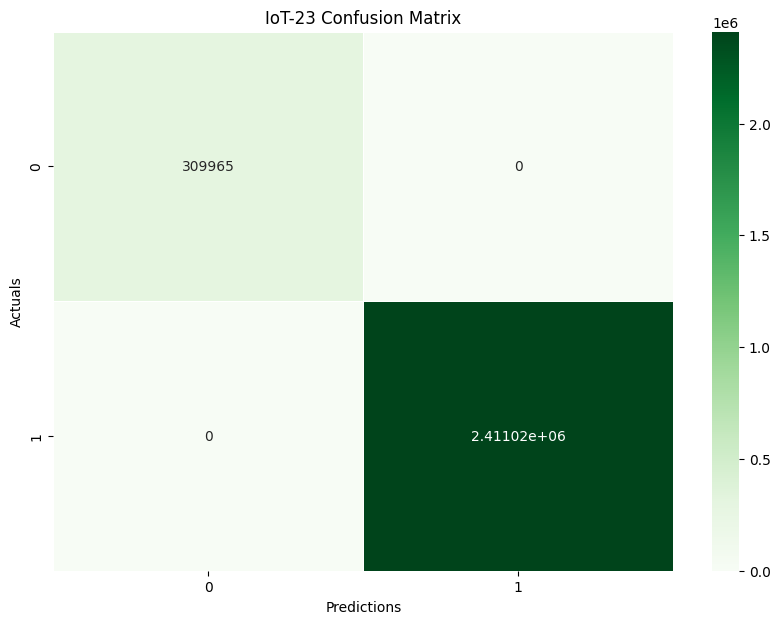

ROC AUC: 1.0


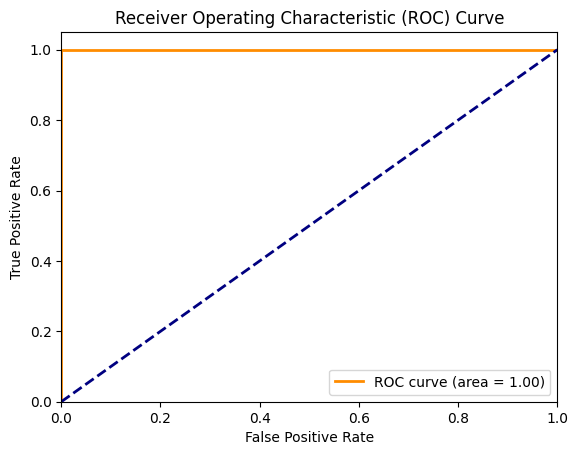

['validated_best_catboost_model.pkl']

In [8]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score, roc_curve
from itertools import product
import joblib
import time
import matplotlib.pyplot as plt
import seaborn as sns

validation_data = test_data
X_val = validation_data.drop(columns=['attack'])
y_val = validation_data['attack']

y_val_pred = best_model.predict(X_val)

validation_accuracy = accuracy_score(y_val, y_val_pred)
validation_f1 = f1_score(y_val, y_val_pred, average='weighted')
validation_recall = recall_score(y_val, y_val_pred, average='weighted')
validation_precision = precision_score(y_val, y_val_pred, average='weighted')

print(f"Validation Accuracy: {validation_accuracy}")
print(f"Validation F1 Score: {validation_f1}")
print(f"Validation Recall: {validation_recall}")
print(f"Validation Precision: {validation_precision}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Plot Confusion Matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Greens', linewidths=.5)
plt.title('IoT-23 Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.show()

# ROC Curve and AUC
y_val_prob = best_model.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
roc_auc = roc_auc_score(y_val, y_val_prob)

print(f"ROC AUC: {roc_auc}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Save the best model after validation
joblib.dump(best_model, 'validated_best_catboost_model.pkl')